In [4]:
%pip install matplotlib
%pip install pandas
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [6]:
test_data = pd.read_csv("/Users/nusranazar/Desktop/Study Stuff/FALL 24/3920 Project/Dataset/test.csv")
train_data = pd.read_csv("/Users/nusranazar/Desktop/Study Stuff/FALL 24/3920 Project/Dataset/train.csv")

In [7]:
train_data

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


In [8]:
# Remove quotes and replace spaces with underscores
train_data.columns = [col.strip().replace("'", '').replace(' ', '_') for col in train_data.columns]

test_data.columns = [col.strip().replace("'", '').replace(' ', '_') for col in test_data.columns]

In [9]:
train_data.columns

Index(['Patient_Id', 'Patient_Age', 'Genes_in_mothers_side',
       'Inherited_from_father', 'Maternal_gene', 'Paternal_gene',
       'Blood_cell_count_(mcL)', 'Patient_First_Name', 'Family_Name',
       'Fathers_name', 'Mothers_age', 'Fathers_age', 'Institute_Name',
       'Location_of_Institute', 'Status', 'Respiratory_Rate_(breaths/min)',
       'Heart_Rate_(rates/min', 'Test_1', 'Test_2', 'Test_3', 'Test_4',
       'Test_5', 'Parental_consent', 'Follow-up', 'Gender', 'Birth_asphyxia',
       'Autopsy_shows_birth_defect_(if_applicable)', 'Place_of_birth',
       'Folic_acid_details_(peri-conceptional)',
       'H/O_serious_maternal_illness', 'H/O_radiation_exposure_(x-ray)',
       'H/O_substance_abuse', 'Assisted_conception_IVF/ART',
       'History_of_anomalies_in_previous_pregnancies',
       'No._of_previous_abortion', 'Birth_defects',
       'White_Blood_cell_count_(thousand_per_microliter)', 'Blood_test_result',
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Sympt

In [10]:
# Drop rows where 'Genetic_Disorder' is NaN
train_data.dropna(subset=['Genetic_Disorder'], inplace=True)

# Reset the index to update row numbers and avoid keeping the old index
train_data.reset_index(drop=True, inplace=True)


In [11]:
train_data.isnull().sum()

Patient_Id                                             0
Patient_Age                                         1225
Genes_in_mothers_side                                  0
Inherited_from_father                                261
Maternal_gene                                       2424
Paternal_gene                                          0
Blood_cell_count_(mcL)                                 0
Patient_First_Name                                     0
Family_Name                                         8350
Fathers_name                                           0
Mothers_age                                         5204
Fathers_age                                         5165
Institute_Name                                      4422
Location_of_Institute                                  0
Status                                                 0
Respiratory_Rate_(breaths/min)                      1826
Heart_Rate_(rates/min                               1805
Test_1                         

In [12]:
train_data = train_data.drop(columns=['Patient_Id','Patient_First_Name', 'Family_Name',
       'Fathers_name','Institute_Name', 'Place_of_birth',
       'Location_of_Institute', 'Parental_consent', 'Test_1', 'Test_2', 'Test_3', 'Test_4',
       'Test_5', 
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Autopsy_shows_birth_defect_(if_applicable)'])

In [13]:
train_data

,Patient_Age,Genes_in_mothers_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count_(mcL),Mothers_age,Fathers_age,Status,Respiratory_Rate_(breaths/min),...,H/O_radiation_exposure_(x-ray),H/O_substance_abuse,Assisted_conception_IVF/ART,History_of_anomalies_in_previous_pregnancies,No._of_previous_abortion,Birth_defects,White_Blood_cell_count_(thousand_per_microliter),Blood_test_result,Genetic_Disorder,Disorder_Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,No,No,No,Yes,NaN,NaN,9.857562,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,Multifactorial genetic inheritance disorders,Diabetes
2,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,Multifactorial genetic inheritance disorders,Cancer
4,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,No,NaN,No,0.0,Multiple,10.272230,normal,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,9.0,No,Yes,Yes,Yes,5.012599,47.0,NaN,Deceased,NaN,...,No,Not applicable,Yes,Yes,NaN,NaN,12.000000,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
19933,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,Not applicable,No,Yes,No,3.0,Multiple,6.584811,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
19934,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),...,No,-,Yes,No,2.0,Multiple,7.041556,inconclusive,Multifactorial genetic inheritance disorders,Diabetes
19935,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,NaN,No,No,No,2.0,Singular,7.715464,normal,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [14]:
train_data.isnull().sum()


Patient_Age                                         1225
Genes_in_mothers_side                                  0
Inherited_from_father                                261
Maternal_gene                                       2424
Paternal_gene                                          0
Blood_cell_count_(mcL)                                 0
Mothers_age                                         5204
Fathers_age                                         5165
Status                                                 0
Respiratory_Rate_(breaths/min)                      1826
Heart_Rate_(rates/min                               1805
Follow-up                                           1862
Gender                                              1844
Birth_asphyxia                                      1848
Folic_acid_details_(peri-conceptional)              1814
H/O_serious_maternal_illness                        1824
H/O_radiation_exposure_(x-ray)                      1830
H/O_substance_abuse            

In [15]:
train_data

,Patient_Age,Genes_in_mothers_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count_(mcL),Mothers_age,Fathers_age,Status,Respiratory_Rate_(breaths/min),...,H/O_radiation_exposure_(x-ray),H/O_substance_abuse,Assisted_conception_IVF/ART,History_of_anomalies_in_previous_pregnancies,No._of_previous_abortion,Birth_defects,White_Blood_cell_count_(thousand_per_microliter),Blood_test_result,Genetic_Disorder,Disorder_Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,No,No,No,Yes,NaN,NaN,9.857562,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,Multifactorial genetic inheritance disorders,Diabetes
2,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,Multifactorial genetic inheritance disorders,Cancer
4,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,No,NaN,No,0.0,Multiple,10.272230,normal,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,9.0,No,Yes,Yes,Yes,5.012599,47.0,NaN,Deceased,NaN,...,No,Not applicable,Yes,Yes,NaN,NaN,12.000000,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
19933,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,Not applicable,No,Yes,No,3.0,Multiple,6.584811,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
19934,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),...,No,-,Yes,No,2.0,Multiple,7.041556,inconclusive,Multifactorial genetic inheritance disorders,Diabetes
19935,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,NaN,No,No,No,2.0,Singular,7.715464,normal,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


/var/folders/n8/v9ww031d5m1g616hh9q833700000gn/T/ipykernel_3616/3877857744.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Genetic_Disorder', ax=axes[0], palette='Set2')
/var/folders/n8/v9ww031d5m1g616hh9q833700000gn/T/ipykernel_3616/3877857744.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Disorder_Subclass', ax=axes[1], palette='Set1')


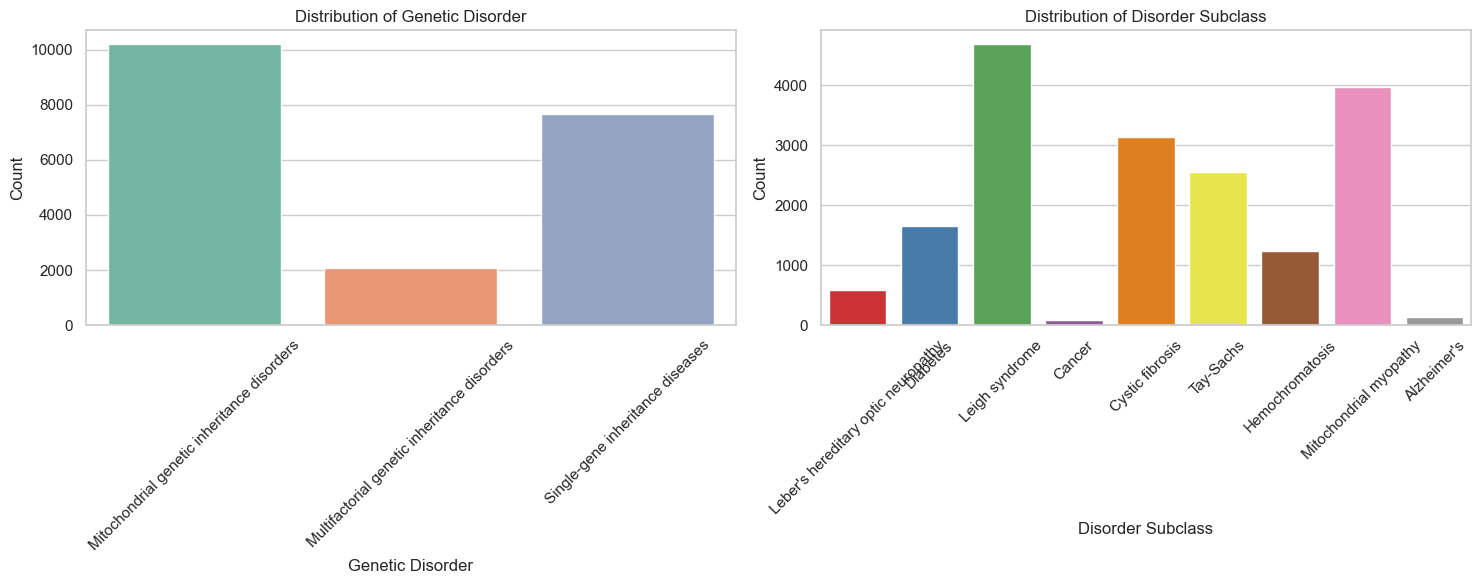

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data is your actual DataFrame

# Check if the necessary columns are present
required_columns = ['Genetic_Disorder', 'Disorder_Subclass']

if all(column in train_data.columns for column in required_columns):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    # Create a figure for the distribution plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Distribution of Genetic Disorder
    sns.countplot(data=train_data, x='Genetic_Disorder', ax=axes[0], palette='Set2')
    axes[0].set_title('Distribution of Genetic Disorder')
    axes[0].set_xlabel('Genetic Disorder')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility

    # Distribution of Disorder Subclass
    sns.countplot(data=train_data, x='Disorder_Subclass', ax=axes[1], palette='Set1')
    axes[1].set_title('Distribution of Disorder Subclass')
    axes[1].set_xlabel('Disorder Subclass')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility

    # Adjust layout
    plt.tight_layout()
    plt.show()
else:
    print("The required columns are not present in the dataset.")


In [18]:
import pandas as pd



# Encoding categorical features
encoding_map = {
    'genes_in_mothers_side': {'Yes': 1, 'No': 0},
    'inherited_from_father': {'Yes': 1, 'No': 0},
    'maternal_gene': {'Yes': 1, 'No': 0},
    'paternal_gene': {'Yes': 1, 'No': 0},
    'assisted_conception_IVF_ART': {'Yes': 1, 'No': 0},
    'history_of_anomalies_in_previous_pregnancies': {'Yes': 1, 'No': 0},
    'folic_acid_details_peri_conceptional': {'Yes': 1, 'No': 0},
    'H_O_serious_maternal_illness': {'Yes': 1, 'No': 0},
    'H_O_radiation_exposure_X_ray': {'Yes': 1, 'No': 0, 'Not applicable': -1},
    'H_O_substance_abuse': {'Yes': 1, 'No': 0, 'Not applicable': -1},
    'status': {'deceased': 0, 'alive': 1},
    'respiratory_rate_breaths_min': {'normal (30–60)': 0, 'Tachypnea': 1},
    'heart_rate_rates_min': {'normal': 0, 'Tachypnea': 1},
    'follow_up': {'Low': 0, 'High': 1},
    'gender': {'male': 0, 'female': 1, 'ambiguous': 2},
    'birth_asphyxia': {'No record': 0, 'Not available': 0, 'No': 0, 'Yes': 1},
    'birth_defects': {'singular': 0, 'multiple': 1},
    'blood_test_result': {'normal': 0, 'abnormal': 1}
}

# Apply encoding to each column in the DataFrame
for column, mapping in encoding_map.items():
    if column in train_data.columns:
        train_data[column] = train_data[column].replace(mapping)

# Display the updated DataFrame (optional)
print(train_data.head())


   Patient_Age Genes_in_mothers_side Inherited_from_father Maternal_gene  \
0          2.0                   Yes                    No           Yes   
1          6.0                   Yes                    No            No   
2         12.0                   Yes                    No           Yes   
3         11.0                   Yes                    No           NaN   
4         14.0                   Yes                    No           Yes   

  Paternal_gene  Blood_cell_count_(mcL)  Mothers_age  Fathers_age    Status  \
0            No                4.760603          NaN          NaN     Alive   
1            No                4.893297         41.0         22.0     Alive   
2            No                4.705280         21.0          NaN  Deceased   
3           Yes                4.720703         32.0          NaN     Alive   
4            No                5.103188          NaN          NaN  Deceased   

  Respiratory_Rate_(breaths/min)  ... H/O_radiation_exposure_(x-ray)

In [24]:
train_data.isnull().sum()


Patient_Age                                         1051
Genes_in_mothers_side                                  0
Inherited_from_father                                218
Maternal_gene                                       2080
Paternal_gene                                          0
Blood_cell_count_(mcL)                                 0
Mothers_age                                         4511
Fathers_age                                         4455
Status                                                 0
Respiratory_Rate_(breaths/min)                      1579
Heart_Rate_(rates/min                               1545
Follow-up                                           1588
Gender                                              1567
Birth_asphyxia                                      1590
Folic_acid_details_(peri-conceptional)              1559
H/O_serious_maternal_illness                        1568
H/O_radiation_exposure_(x-ray)                      1589
H/O_substance_abuse            

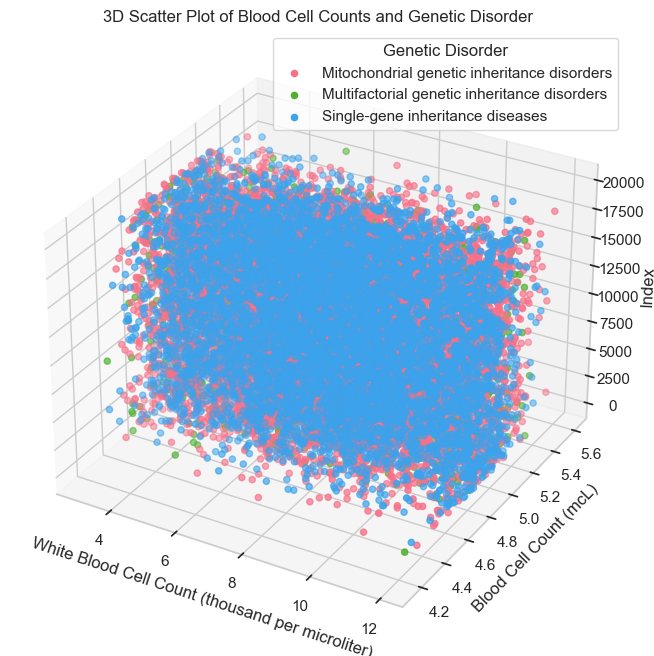

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming train_data is your actual DataFrame

# Check if the necessary columns are present
required_columns = [
    'White_Blood_cell_count_(thousand_per_microliter)', 
    'Blood_cell_count_(mcL)', 
    'Genetic_Disorder'
]

if all(column in train_data.columns for column in required_columns):
    # Create a figure and a 3D subplot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Define colors for different Genetic_Disorder categories
    unique_disorders = train_data['Genetic_Disorder'].unique()
    colors = sns.color_palette("husl", len(unique_disorders))
    color_map = dict(zip(unique_disorders, colors))

    # Create scatter plot with color coding by Genetic_Disorder
    for disorder in unique_disorders:
        subset = train_data[train_data['Genetic_Disorder'] == disorder]
        ax.scatter(
            subset['White_Blood_cell_count_(thousand_per_microliter)'],
            subset['Blood_cell_count_(mcL)'],
            subset.index,  # Using the index for depth/height in 3D scatter plot
            label=disorder,
            color=color_map[disorder]
        )

    # Setting labels and title
    ax.set_xlabel('White Blood Cell Count (thousand per microliter)')
    ax.set_ylabel('Blood Cell Count (mcL)')
    ax.set_zlabel('Index')
    ax.set_title('3D Scatter Plot of Blood Cell Counts and Genetic Disorder')

    # Adding legend
    ax.legend(title='Genetic Disorder')

    # Show the plot
    plt.show()
else:
    print("The required columns are not present in the dataset.")


Unique values in 'Genetic_Disorder': [0 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Unique values in 'Genetic_Disorder' after encoding: [0 1 2]


/var/folders/n8/v9ww031d5m1g616hh9q833700000gn/T/ipykernel_3616/3028904484.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Genetic_Disorder'] = train_data['Genetic_Disorder'].replace(disorder_mapping)
/var/folders/n8/v9ww031d5m1g616hh9q833700000gn/T/ipykernel_3616/3028904484.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Genetic_Disorder'] = train_data['Genetic_Disorder'].replace(disorder_mapping)


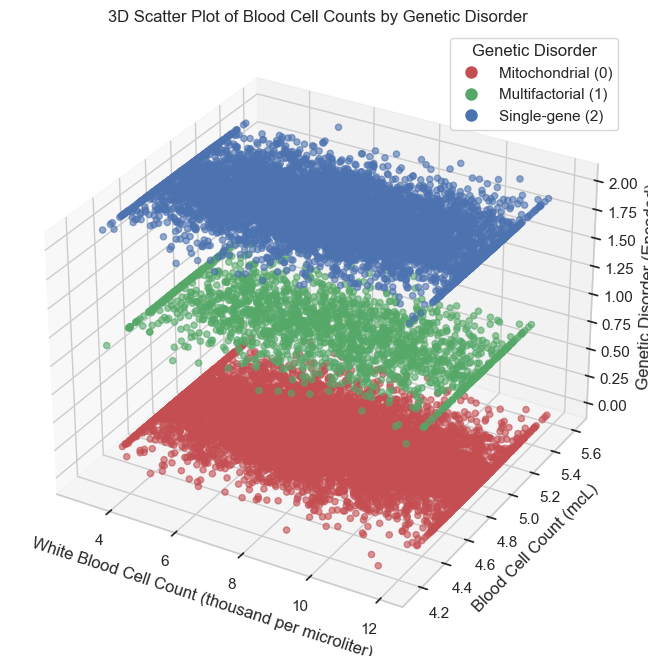

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Check unique values in the 'Genetic_Disorder' column
print("Unique values in 'Genetic_Disorder':", train_data['Genetic_Disorder'].unique())

# Update the disorder mapping with all unique values from your dataset
disorder_mapping = {
    'Mitochondrial genetic inheritance disorders': 0,
    'Multifactorial genetic inheritance disorders': 1,
    'Single-gene inheritance diseases': 2
}

# Replace the values in the Genetic_Disorder column
train_data['Genetic_Disorder'] = train_data['Genetic_Disorder'].replace(disorder_mapping)

# Check for any remaining non-numeric values in 'Genetic_Disorder'
print("Unique values in 'Genetic_Disorder' after encoding:", train_data['Genetic_Disorder'].unique())

# Drop any rows where 'White_Blood_cell_count_(thousand_per_microliter)' or 'Blood_cell_count_(mcL)' are NaN
train_data = train_data.dropna(subset=['White_Blood_cell_count_(thousand_per_microliter)', 'Blood_cell_count_(mcL)', 'Genetic_Disorder'])

# Ensure Genetic_Disorder is of integer type for plotting
train_data['Genetic_Disorder'] = train_data['Genetic_Disorder'].astype(int)

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for different Genetic_Disorder categories
colors = {0: 'r', 1: 'g', 2: 'b'}

# Create the 3D scatter plot
ax.scatter(
    train_data['White_Blood_cell_count_(thousand_per_microliter)'],
    train_data['Blood_cell_count_(mcL)'],
    train_data['Genetic_Disorder'],
    c=train_data['Genetic_Disorder'].map(colors),
    alpha=0.6
)

# Setting labels and title
ax.set_xlabel('White Blood Cell Count (thousand per microliter)')
ax.set_ylabel('Blood Cell Count (mcL)')
ax.set_zlabel('Genetic Disorder (Encoded)')
ax.set_title('3D Scatter Plot of Blood Cell Counts by Genetic Disorder')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors.values()]
labels = ['Mitochondrial (0)', 'Multifactorial (1)', 'Single-gene (2)']
ax.legend(handles, labels, title='Genetic Disorder')

# Show the plot
plt.show()
